In [1]:
# Covid-19 project
# Investigate whether deaths caused by COVID-19 by country can be predicted by examining, analizing and using 
# relevant common, well-established data

# ML algorithm used: 
    # XGBoost regression model.

# Relevant common data by country
    # Continent --> 
        # 2020 data from https://simple.wikipedia.org/wiki/List_of_countries_by_continents
    # Population density (Population per square km) --> 
        # 2018 data from https://data.worldbank.org/indicator/EN.POP.DNST
    # Percentage of population in urban agglomerations of more than 1 million (Agglomerates (%)) --> 
        # 2019 data from https://data.worldbank.org/indicator/EN.URB.MCTY.TL.ZS
    # Population age distribution: percentage of population in the following age groups - 0-14, 15-64, 65- --> 
        # 2020 data from http://wdi.worldbank.org/table/2.1
    # GDP per cpita --> 
        # 2019 data from https://data.worldbank.org/indicator/NY.GDP.PCAP.CD
    # Healthcare Access and Quality (HAQ) Index --> 
        # 2016 data from https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(18)30994-2/fulltext
        
# COVID-19 data
    # Data up to 2020-07-22 from https://coronavirus.jhu.edu/data/mortality which includes:
        # Confirmed positive cases
        # Deaths
        # Case fatality (percentage of deaths among positive cases)
        # Deaths per 100K of the county population
        
# All data was wrangled and compiled in one source file, ms_covid19_2020_07_22.csv, available on
# https://github.com/marin-stoytchev/data-science-projects/tree/master/covid_19_project

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style = "whitegrid", font_scale = 1.5)

In [3]:
# Ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read data

data = pd.read_csv('covid19_2020_07_22.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                159 non-null    object 
 1   Continent              159 non-null    object 
 2   Population per sqr km  159 non-null    float64
 3   Agglomerates (%)       159 non-null    float64
 4   Age 0-14 (%)           159 non-null    int64  
 5   Age 15-64 (%)          159 non-null    int64  
 6   Age 65- (%)            159 non-null    int64  
 7   GDP per capita ($)     159 non-null    float64
 8   HAQ Index              159 non-null    int64  
 9   Confirmed              159 non-null    int64  
 10  Deaths                 159 non-null    int64  
 11  Case fatality          159 non-null    float64
 12  Deaths per 100K        159 non-null    float64
dtypes: float64(5), int64(6), object(2)
memory usage: 16.3+ KB


In [5]:
# Preview data

data.head(10)

,Country,Continent,Population per sqr km,Agglomerates (%),Age 0-14 (%),Age 15-64 (%),Age 65- (%),GDP per capita ($),HAQ Index,Confirmed,Deaths,Case fatality,Deaths per 100K
0,Afghanistan,Asia,56.94,10.81,42,55,3,502.11,26,35727,1190,0.033,3.20
1,Albania,Europe,104.61,0.00,17,68,14,5352.85,75,4358,120,0.028,4.19
2,Algeria,Africa,17.73,6.33,31,63,7,3948.30,63,24872,1111,0.045,2.63
3,Andorra,Europe,163.84,0.00,14,70,16,40886.40,95,889,52,0.058,67.53
4,Angola,Africa,24.71,25.27,47,51,2,2973.59,33,812,33,0.041,0.11
5,Antigua and Barbuda,N. America,218.83,0.00,22,69,9,17790.30,70,76,3,0.039,3.12
6,Argentina,S. America,16.26,42.90,25,64,11,10006.14,68,141900,2588,0.018,5.82
7,Armenia,Asia,103.68,36.62,21,68,11,4622.73,71,35693,678,0.019,22.97
8,Australia,Australia,3.25,60.89,19,65,16,54907.10,96,13302,133,0.010,0.53
9,Austria,Europe,107.13,21.57,14,67,19,50277.27,94,19929,711,0.036,8.04


In [6]:
# Note: the zero values in 'Agglomerates (%)' are true 0s since the corresponding coutries have no cities over 1 million

In [7]:
# 1) EDA

In [8]:
# For consistency convert 'Case fatality' from rational numbers (ratios) to percentages

data['Case fatality'] = 100 * data['Case fatality']

In [9]:
# Get data column names
data.columns

Index(['Country', 'Continent', 'Population per sqr km', 'Agglomerates (%)',
       'Age 0-14 (%)', 'Age 15-64 (%)', 'Age 65- (%)', 'GDP per capita ($)',
       'HAQ Index', 'Confirmed', 'Deaths', 'Case fatality', 'Deaths per 100K'],
      dtype='object')

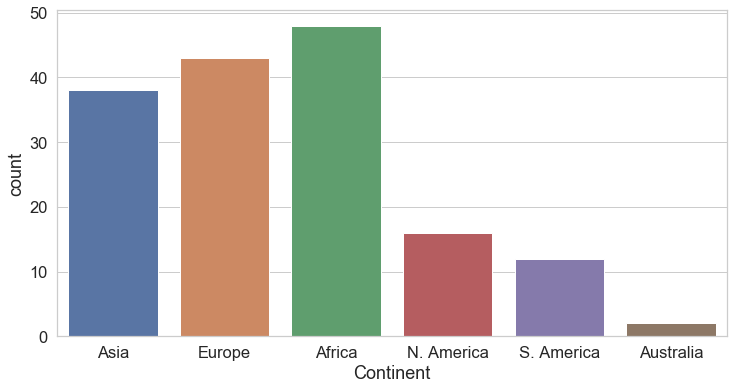

In [10]:
# Countplot of number of coutries by continent

plt.figure(figsize = (12, 6))
sns.countplot(data['Continent'])
plt.show()

In [11]:
# Get precise count of countries by continent

data['Continent'].value_counts()

Africa        48
Europe        43
Asia          38
N. America    16
S. America    12
Australia      2
Name: Continent, dtype: int64

In [12]:
# Africa, Europe and Asia have the largest representation, followed by North and South America; 
# Australian continent is represented by two countries only --> Australia and New Zeeland

In [13]:
# Examine distributions of feature values by continent via boxplots

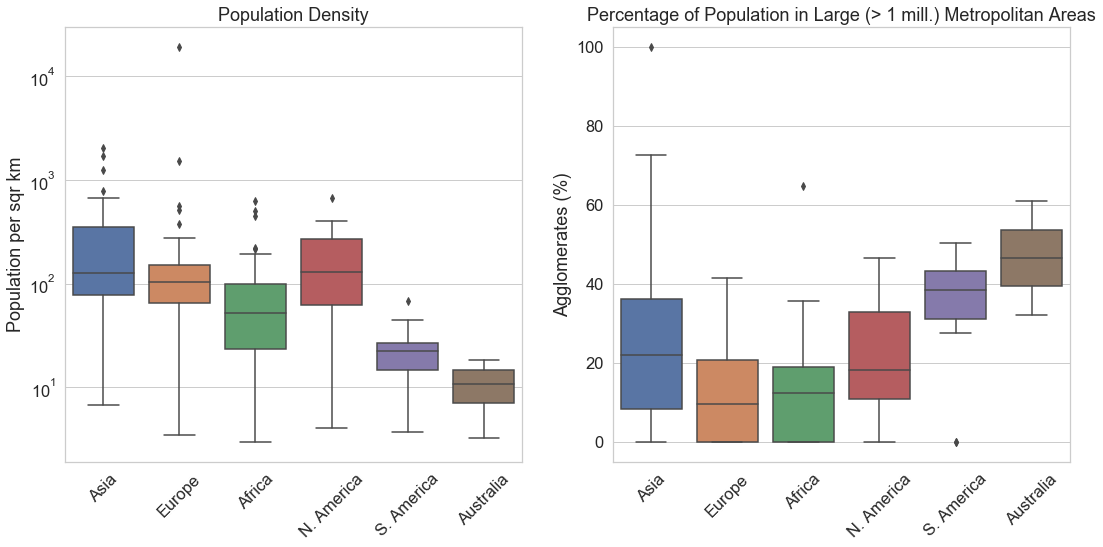

In [14]:
# Boxplots of Population Density and Percentage of people living in large metro areas (> 1 mill.) vs. Continent

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey = False)

sns.boxplot(x = 'Continent', y = 'Population per sqr km', data = data, ax = axes[0])
axes[0].set(xlabel = None)
axes[0].tick_params(axis = 'x', rotation = 45)
axes[0].set(yscale = 'log')
axes[0].set(title = 'Population Density')

sns.boxplot(x = 'Continent', y = 'Agglomerates (%)', data = data, ax = axes[1])
axes[1].set(xlabel = None)
axes[1].tick_params(axis = 'x', rotation = 45)
axes[1].set(title = 'Percentage of Population in Large (> 1 mill.) Metropolitan Areas')

plt.show()

In [15]:
# Two trends are observed
#1) High population density with low(er) percentege of people in large (> 1 mill.) metro areas -->
    # Asia, Europe, Africa, N. America
#2) Low population density with high(er) percentege of people in large (> 1 mill.) metro areas -->
    # S. America, Australia

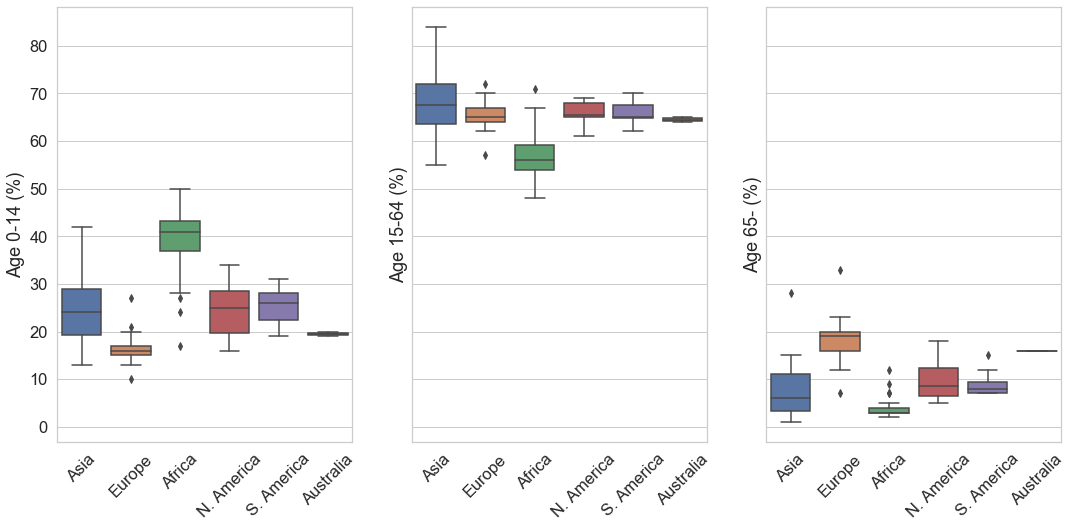

In [16]:
# Boxplots of Age Demographics vs. Continent

fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey = True)

sns.boxplot(x = 'Continent', y = 'Age 0-14 (%)', data = data, ax = axes[0])
axes[0].set(xlabel = None)
axes[0].tick_params(axis = 'x', rotation = 45)
axes[0].set_yticks(np.arange(0, 100, 10))

sns.boxplot(x = 'Continent', y = 'Age 15-64 (%)', data = data, ax = axes[1])
axes[1].set(xlabel = None)
axes[1].tick_params(axis = 'x', rotation = 45)

sns.boxplot(x = 'Continent', y = 'Age 65- (%)', data = data, ax = axes[2])
axes[2].set(xlabel = None)
axes[2].tick_params(axis = 'x', rotation = 45)

plt.tight_layout
plt.show()

In [17]:
# Main observations:
    # 1) Africa: 'youngest' continent with average of ~ 40 % of population below 15 years old and only ~ 3 % older than 64
    # 2) Europe: 'oldest' continent with average of ~ 15 % of population below 15 years old and ~ 20 % older than 64
    # 3) Rest of continets: 'middle-aged' with similar age demographics with some deviations (more pronounced for Age 65-)

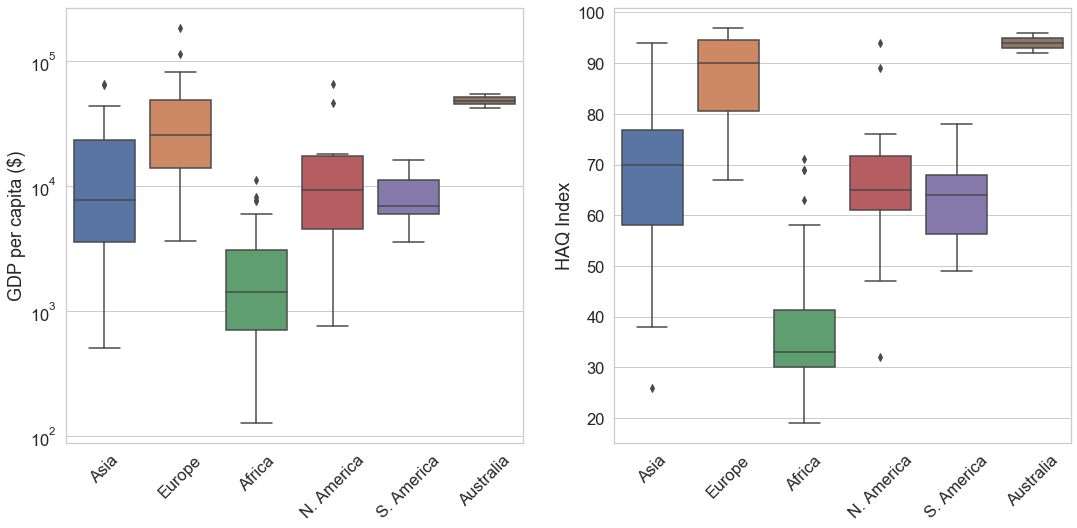

In [18]:
# Boxplots of GDP per capita and HAQ Index vs. Continent

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey = False)

sns.boxplot(x = 'Continent', y = 'GDP per capita ($)', data = data, ax = axes[0])
axes[0].tick_params(axis = 'x', rotation = 45)
axes[0].set(yscale = 'log')
axes[0].set(xlabel = None)

sns.boxplot(x = 'Continent', y = 'HAQ Index', data = data, ax = axes[1])
axes[1].tick_params(axis = 'x', rotation = 45)
axes[1].set(xlabel = None)

plt.show()

In [19]:
# Clear visual corellation between these two features (natural to expect)
# Lowest score in both charts: Africa
# Max scores in both charts: Australia + New Zeeland, Europe
# Middle socres:Asia, N. America, S. America

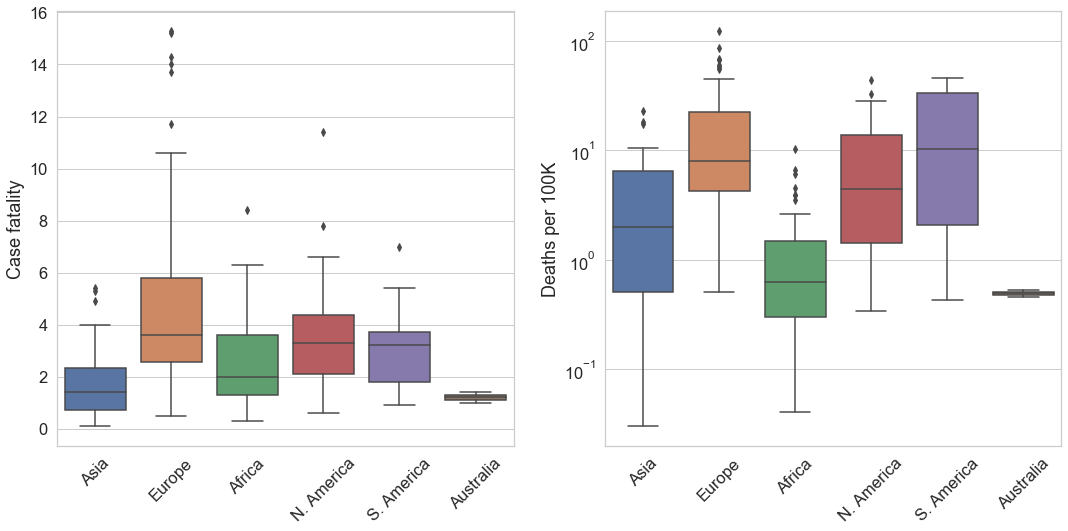

In [20]:
# Boxplots of the two possible targets, Case fatality and Deaths per 100K, vs. Continent

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey = False)

sns.boxplot(x = 'Continent', y = 'Case fatality', data = data, ax = axes[0])
axes[0].tick_params(axis = 'x', rotation = 45)
axes[0].set(xlabel = None)

sns.boxplot(x = 'Continent', y = 'Deaths per 100K', data = data, ax = axes[1])
axes[1].tick_params(axis = 'x', rotation = 45)
axes[1].set(xlabel = None)
axes[1].set(yscale = 'log')

plt.show()

In [21]:
# Both 'Case fatality' and 'Deaths per 100K' show large variations
# However, for many reasons 'Case fatality' is not considered a reliable measure --> 
    # select 'Deaths per 100K' as target

In [22]:
# For better correlation and pairplot visualization create new dataset, data_1, consisting of most relevant features

data_1 = data[['Population per sqr km', 'Agglomerates (%)', 'Age 15-64 (%)', 'Age 65- (%)', 'GDP per capita ($)', 
               'HAQ Index','Deaths per 100K']]
# 'Age 0-14 (%)' is being dropped because of explicit relationship with 'Age 15-64 (%)' and 'Age 65- (%)' --> 
    # 'Age 0-14 (%)' = 100 - ('Age 15-64 (%)' + 'Age 65- (%)')

data_1.head(10)

,Population per sqr km,Agglomerates (%),Age 15-64 (%),Age 65- (%),GDP per capita ($),HAQ Index,Deaths per 100K
0,56.94,10.81,55,3,502.11,26,3.20
1,104.61,0.00,68,14,5352.85,75,4.19
2,17.73,6.33,63,7,3948.30,63,2.63
3,163.84,0.00,70,16,40886.40,95,67.53
4,24.71,25.27,51,2,2973.59,33,0.11
5,218.83,0.00,69,9,17790.30,70,3.12
6,16.26,42.90,64,11,10006.14,68,5.82
7,103.68,36.62,68,11,4622.73,71,22.97
8,3.25,60.89,65,16,54907.10,96,0.53
9,107.13,21.57,67,19,50277.27,94,8.04


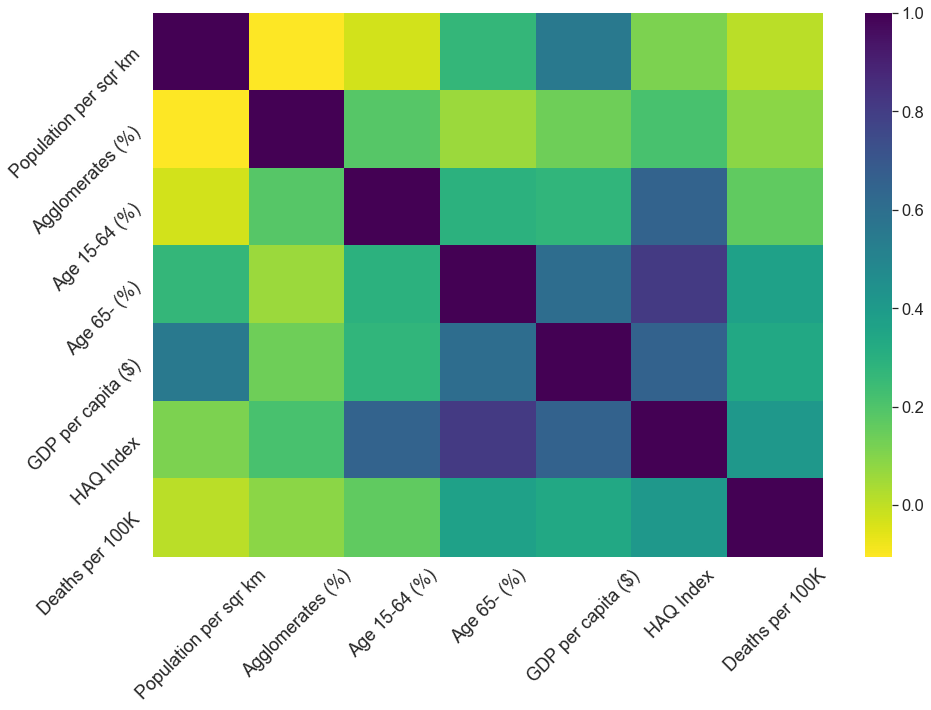

In [23]:
# Plot heatmap of the correlation matrix for data_1 to examine for highly-correlated features

plt.figure(figsize = (15, 10))
sns.heatmap(data_1.corr(), cmap = 'viridis_r')
plt.tick_params(labelsize = 18, rotation = 45)
plt.show()

In [24]:
# No strong correlation between most of the features
# Higher degree of correlation is observed between
    # 'HAQ Index' and 'Age 65- (%)'
    # 'HAQ Index' and 'Age 15-64 (%)'
    # 'HAQ Index' and 'GDP per capita ($)'
    # all of these are natural to expect
# Surprisingly, very low correlation is observed between 'Deaths per 100K' and the two population density features

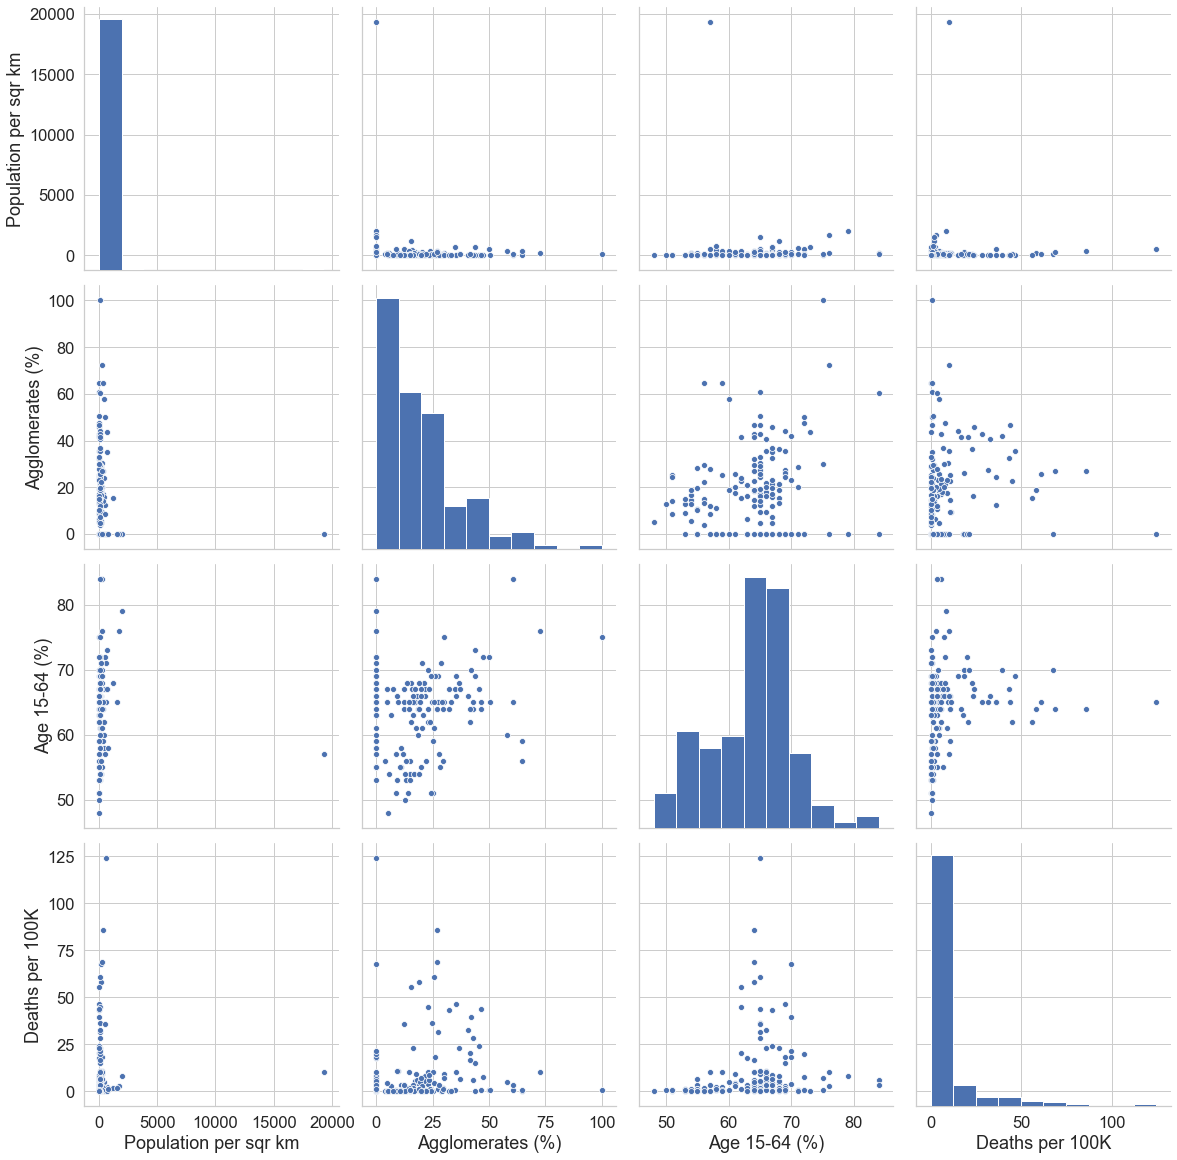

In [25]:
# For better readability, create pairplot with first half of data only + target

sns.pairplot(data_1.iloc[:, [0, 1, 2, 6]], height = 4, aspect = 1)
plt.tight_layout
plt.show()

In [26]:
# There appear to be no clear dependence of the target on the features plotted here and dependence between features as well
# Note: Population Density distribution plotted here is strongly skewed because of a single extremely large value (Monaco)

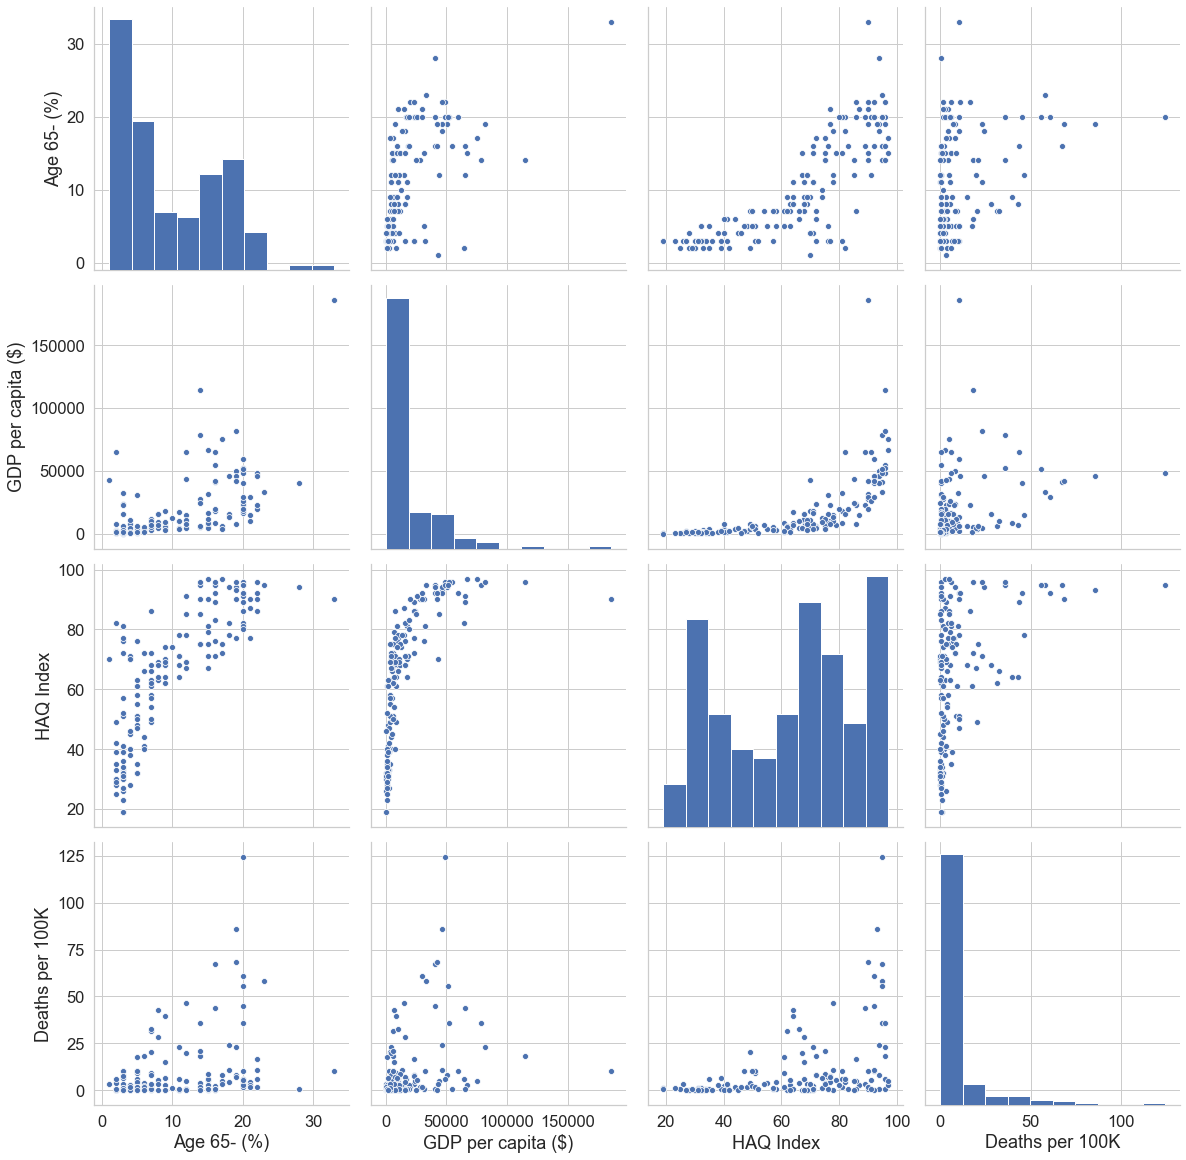

In [27]:
# Create pairplot with second half of data + target

sns.pairplot(data_1.iloc[:, [3, 4, 5, 6]], height = 4, aspect = 1)
plt.tight_layout
plt.show()

In [28]:
# A more defined relationship is observed between 'HAQ Index' and 'Age 65- (%)' as already indicated by the correlation matrix
# To lesser degree relationship is observed between 'HAQ Index' and 'GDP per capita ($)', as well
# However, the relationships between Deths per 100K and these three features is not clear --> investigate these in more detail

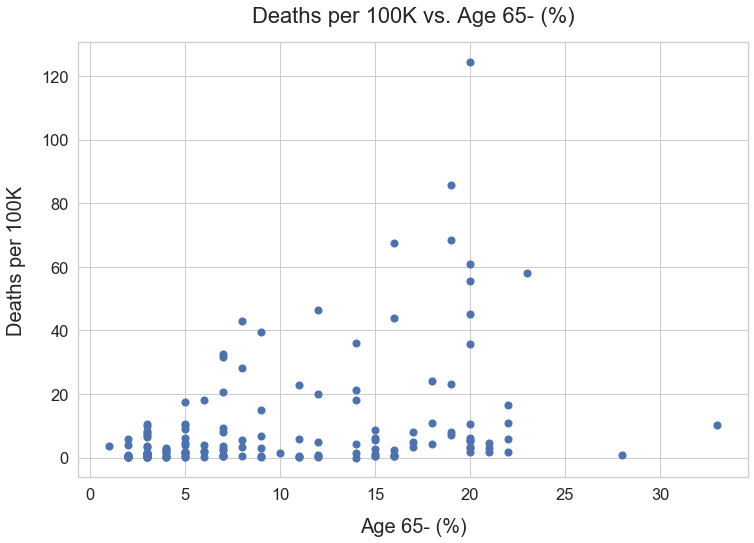

In [29]:
# Create scatterplot between 'Deaths per 100K' and 'Age 65-'

plt.figure(figsize = (12, 8))
plt.scatter(data['Age 65- (%)'], data['Deaths per 100K'], s = 50, c = 'b')
plt.xlabel('Age 65- (%)', fontsize = 20, labelpad = 15)
plt.ylabel('Deaths per 100K', fontsize = 20, labelpad = 15)
plt.title('Deaths per 100K vs. Age 65- (%)', fontsize = 22, pad = 20)

plt.show()

In [30]:
# Main observations from plot
# 1) Some of the highest death rate values are observed for the percentage of population older than 65 being within 15-25 %
    # However, there is no consitent relationship in this range since the majority of death rate values are still very low
    # and the two data points with highest percentage of people older than 65 show low death rate
# 2) Consistently low death rate values are observed for the percentage of people above 65 being within 0-5 % 

# These observations are consistent with studies showng that COVID-19 has highest mortality rate for people older than 65

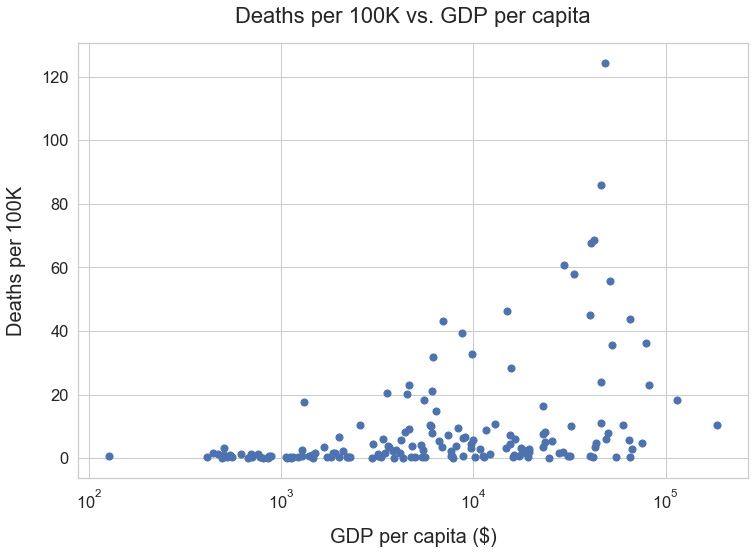

In [31]:
# Create scatterplot between 'Deaths per 100K' and 'GDP per capita ($)'

plt.figure(figsize = (12, 8))
plt.scatter(data['GDP per capita ($)'], data['Deaths per 100K'], s = 50, c = 'b')
plt.xscale('log')
plt.xlabel('GDP per capita ($)', fontsize = 20, labelpad = 15)
plt.ylabel('Deaths per 100K', fontsize = 20, labelpad = 15)
plt.title('Deaths per 100K vs. GDP per capita', fontsize = 22, pad = 20)

plt.show()

In [32]:
# This result is surprising because it defies conventional logic
    # 1) Counrties with lowest GDP per capita consistently show lowest number of deaths per 100k
    # 2) As GDP per capita increases, so is the death rate --> highest death rates are observed for very high GDP values

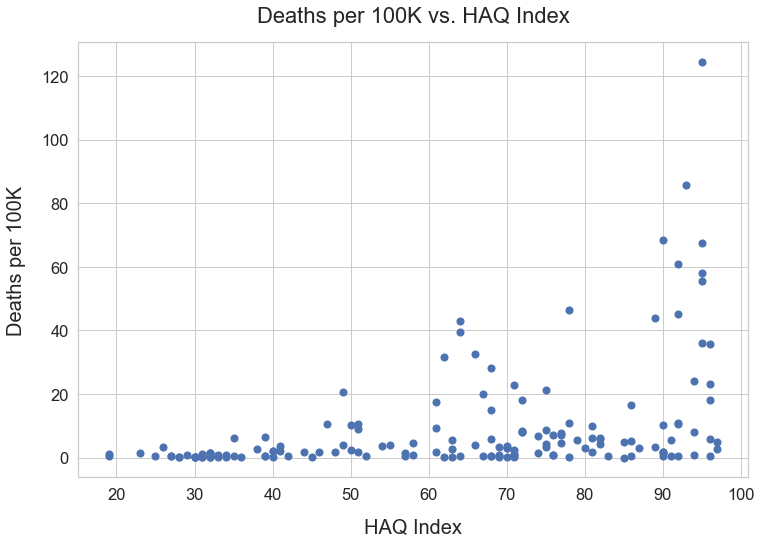

In [33]:
# Create scatterplot between 'Deaths per 100K' and 'HAQ Index'

plt.figure(figsize = (12, 8))
plt.scatter(data['HAQ Index'], data['Deaths per 100K'], s = 50, c = 'b')
plt.xlabel('HAQ Index', fontsize = 20, labelpad = 15)
plt.ylabel('Deaths per 100K', fontsize = 20, labelpad = 15)
plt.title('Deaths per 100K vs. HAQ Index', fontsize = 22, pad = 20)

plt.show()

In [34]:
# This plot resembles the previous plot and again shows a counterintuitive relationship
    # 1) Counrties with the lowest HAQ Index consistently show lowest deaths per 100k
    # 2) Counrties with the highest HAQ Index (best healthcare) show the highest deaths per 100k observed
    
# The two relationships revealed here between mortality rate and GDP and Healthcare quality is suprising and 
# raises questions about the reliability of COVID-19 data
# To some extent one can contribute the low death rates at the low ranges of these features with the low score of people above 65
# However, this argument cannot be applied to explain the wide variations in death rate for the high end ranges 

In [35]:
# 2) Predicting HAQ Index based on conventional factors using XGBoost 

# This is done to establish that the factors considerd here can be used to predict accurately strictly medicaly-derived feature
    # see https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(18)30994-2/fulltext on how HAQ Index is derived

In [36]:
# Create new dataset which include all features relevant to this problem

data.columns

Index(['Country', 'Continent', 'Population per sqr km', 'Agglomerates (%)',
       'Age 0-14 (%)', 'Age 15-64 (%)', 'Age 65- (%)', 'GDP per capita ($)',
       'HAQ Index', 'Confirmed', 'Deaths', 'Case fatality', 'Deaths per 100K'],
      dtype='object')

In [37]:
# New data subset to be used with model

data_2 = data[['Continent', 'Population per sqr km', 'Agglomerates (%)','Age 15-64 (%)', 'Age 65- (%)', 
               'GDP per capita ($)', 'HAQ Index', 'Deaths per 100K']]
data_2.head(10)

,Continent,Population per sqr km,Agglomerates (%),Age 15-64 (%),Age 65- (%),GDP per capita ($),HAQ Index,Deaths per 100K
0,Asia,56.94,10.81,55,3,502.11,26,3.20
1,Europe,104.61,0.00,68,14,5352.85,75,4.19
2,Africa,17.73,6.33,63,7,3948.30,63,2.63
3,Europe,163.84,0.00,70,16,40886.40,95,67.53
4,Africa,24.71,25.27,51,2,2973.59,33,0.11
5,N. America,218.83,0.00,69,9,17790.30,70,3.12
6,S. America,16.26,42.90,64,11,10006.14,68,5.82
7,Asia,103.68,36.62,68,11,4622.73,71,22.97
8,Australia,3.25,60.89,65,16,54907.10,96,0.53
9,Europe,107.13,21.57,67,19,50277.27,94,8.04


In [38]:
# In order to be able to use XGBoost transform 'Continent' values into numeric categorical values

data_2['Continent'].replace({'Africa': 1, 'Asia': 2, 'Europe': 3, 'N. America': 4, 
                             'S. America': 5, 'Australia': 6}, inplace=True)

data_2.head(10)

,Continent,Population per sqr km,Agglomerates (%),Age 15-64 (%),Age 65- (%),GDP per capita ($),HAQ Index,Deaths per 100K
0,2,56.94,10.81,55,3,502.11,26,3.20
1,3,104.61,0.00,68,14,5352.85,75,4.19
2,1,17.73,6.33,63,7,3948.30,63,2.63
3,3,163.84,0.00,70,16,40886.40,95,67.53
4,1,24.71,25.27,51,2,2973.59,33,0.11
5,4,218.83,0.00,69,9,17790.30,70,3.12
6,5,16.26,42.90,64,11,10006.14,68,5.82
7,2,103.68,36.62,68,11,4622.73,71,22.97
8,6,3.25,60.89,65,16,54907.10,96,0.53
9,3,107.13,21.57,67,19,50277.27,94,8.04


In [39]:
# Create features and target from data_2 which we will use with XGBRegressor model

X = data_2.iloc[:, :-2].values # all columns, but last two - HAQ Index and Deaths per 100K
y = data_2.iloc[:, -2].values # HAQ Index column

In [40]:
# Train/test split

from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [41]:
# For best predictions, apply model optimization by using hyperopt

from xgboost import XGBRegressor
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from sklearn import metrics

# Create hyperparameter space to search over
space = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),
        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),
        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),
        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),
        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),
         'gamma': hp.choice('gamma', np.arange(0, 100, 0.5, dtype = float)),
         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 100, 0.5, dtype = float)),
         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 100, 0.5, dtype = float)),
         
        'objective':'reg:squarederror',
        
        'eval_metric': 'rmse'}


def score(params):
    model = XGBRegressor(**params)
    
    model.fit(X_train_1, y_train_1, eval_set=[(X_train_1, y_train_1), (X_test_1, y_test_1)],
              verbose=False, early_stopping_rounds=10)
    y_pred = model.predict(X_test_1)
    score = np.sqrt(metrics.mean_squared_error(y_test_1, y_pred))
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize(trials, space):
    
    best = fmin(score, space, algo = tpe.suggest, max_evals = 500)
    return best

trials = Trials()
best_params = optimize(trials, space)

6.820414556313732                                                                                                      
8.44148134334799                                                                                                       
6.979876536676007                                                                                                      
7.192372618323956                                                                                                      
7.109816410508609                                                                                                      
6.921496001774812                                                                                                      
7.1905995522567165                                                                                                     
6.586739468743373                                                                                                      
6.579581549736932                       

6.87259603503138                                                                                                       
6.861701701009434                                                                                                      
6.741860012770636                                                                                                      
7.935026153144596                                                                                                      
7.3868494254421995                                                                                                     
7.4485287086754                                                                                                        
6.650143493546521                                                                                                      
6.602056999482184                                                                                                      
7.385532680780708                       

6.8691056049057355                                                                                                     
7.079536872617588                                                                                                      
7.088646035201124                                                                                                      
7.219511118660631                                                                                                      
6.90031069063757                                                                                                       
7.012490274286792                                                                                                      
6.934255118225489                                                                                                      
7.7783934495235805                                                                                                     
7.619468913166255                       

6.06907235247408                                                                                                       
6.094191523049101                                                                                                      
6.1439812772514415                                                                                                     
7.475653723636684                                                                                                      
6.905012496297536                                                                                                      
6.727440399735491                                                                                                      
6.8858945004988685                                                                                                     
6.481350771344885                                                                                                      
6.974663841762179                       

6.812440590596414                                                                                                      
7.454692557460036                                                                                                      
6.99921285074231                                                                                                       
7.099830267756901                                                                                                      
7.34767496148382                                                                                                       
7.362716728959743                                                                                                      
8.318567632500063                                                                                                      
7.343414663025137                                                                                                      
6.609472718636752                       

7.291033905708983                                                                                                      
6.643206437930423                                                                                                      
6.8994463804109225                                                                                                     
7.19479600073271                                                                                                       
6.96991454518711                                                                                                       
7.3938297872013905                                                                                                     
6.989306724008651                                                                                                      
8.232543992103391                                                                                                      
7.242605192627577                       

8.0214258968661                                                                                                        
7.669724205649706                                                                                                      
7.689797850132612                                                                                                      
6.254506055497525                                                                                                      
6.627850886192081                                                                                                      
6.842786361379731                                                                                                      
7.117062147959599                                                                                                      
7.68884148241968                                                                                                       
7.899702084839925                       

6.78984316705685                                                                                                       
7.463943050496824                                                                                                      
9.645672704692657                                                                                                      
6.642097691140461                                                                                                      
8.135596923274742                                                                                                      
7.423605370166066                                                                                                      
6.7357925238196295                                                                                                     
6.807837851868481                                                                                                      
7.391130109420658                       

In [42]:
# Return best parameters

space_eval(space, best_params)

{'colsample_bytree': 0.7000000000000001,
 'eval_metric': 'rmse',
 'gamma': 11.5,
 'learning_rate': 0.30000000000000004,
 'max_depth': 13,
 'min_child_weight': 8,
 'n_estimators': 280,
 'objective': 'reg:squarederror',
 'reg_alpha': 2.0,
 'reg_lambda': 47.5,
 'subsample': 0.5}

In [43]:
# Create optimized model

model_1 = XGBRegressor(colsample_bytree = 0.7, 
                         gamma = 11.5,
                         learning_rate = 0.3,
                         max_depth = 13,
                         min_child_weight = 8,
                         n_estimators = 280, 
                         reg_alpha = 2.0, 
                         reg_lambda = 47.5, 
                         subsample = 0.5,  
                         objective = 'reg:squarederror')

In [44]:
# Fit

model_1.fit(X_train_1, y_train_1, 
              eval_set = [(X_train_1, y_train_1), (X_test_1, y_test_1)], 
              eval_metric = 'rmse', 
              verbose = True, 
              early_stopping_rounds = 10)

[0]	validation_0-rmse:57.189	validation_1-rmse:55.6922
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:49.1779	validation_1-rmse:47.8821
[2]	validation_0-rmse:42.1031	validation_1-rmse:40.9627
[3]	validation_0-rmse:36.8084	validation_1-rmse:35.7901
[4]	validation_0-rmse:32.1514	validation_1-rmse:31.2491
[5]	validation_0-rmse:28.7791	validation_1-rmse:28.1268
[6]	validation_0-rmse:25.2245	validation_1-rmse:24.5759
[7]	validation_0-rmse:22.9984	validation_1-rmse:22.3284
[8]	validation_0-rmse:20.5078	validation_1-rmse:19.7732
[9]	validation_0-rmse:18.7698	validation_1-rmse:18.1812
[10]	validation_0-rmse:17.3946	validation_1-rmse:16.8539
[11]	validation_0-rmse:15.9217	validation_1-rmse:15.2939
[12]	validation_0-rmse:14.7118	validation_1-rmse:14.009
[13]	validation_0-rmse:13.8247	validation_1-rmse:13.0809
[14]	validation_0-rmse:13.0072	validation_1-rmse:12.308

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=11.5,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=13, min_child_weight=8, missing=None, n_estimators=280,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=2.0, reg_lambda=47.5, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.5, verbosity=1)

In [45]:
# Predict

y_pred_1 = model_1.predict(X_test_1)

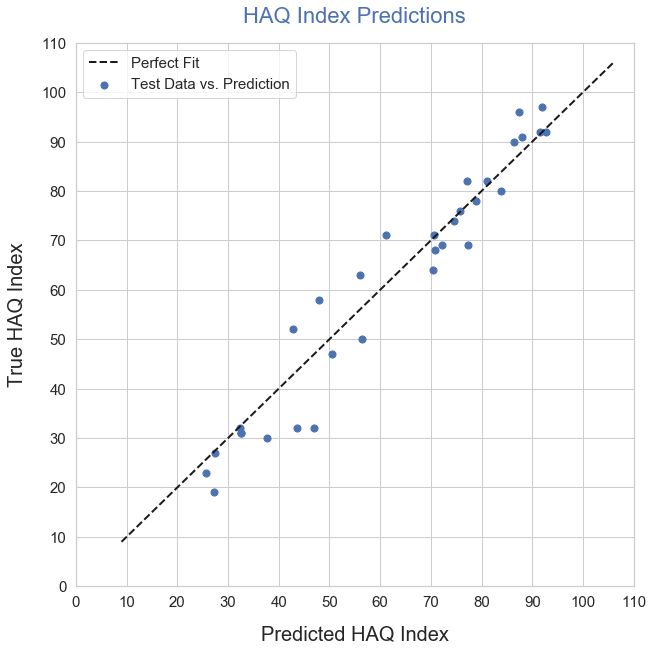

In [46]:
# Compare predictions, y_pred_1, to test values, y_test_1, using scatterplot

# create line to represent perfect fit to y_test

y_line_1 = np.arange(int(y_test_1.min()) - 10, int(y_test_1.max()) + 10)

# set axes limits - adjust if necessary
x_min_1 = 0
x_max_1 = y_test_1.max() + 10
d_x_1 = 10

y_min_1 = 0
y_max_1 = y_test_1.max() + 10
d_y_1 = 10

plt.figure(figsize = (10, 10))
ax = plt.axes()

ax.set_xlim(x_min_1, x_max_1)
ax.set_xticks(np.arange(x_min_1, x_max_1 + d_x_1, d_x_1))

ax.set_ylim(y_min_1, y_max_1)
ax.set_yticks(np.arange(y_min_1, y_max_1 + d_y_1, d_y_1))

plt.scatter(y_pred_1, y_test_1, s = 50, c = 'b', label = 'Test Data vs. Prediction')
plt.plot(y_line_1, y_line_1, 'k--', lw = 2, label = 'Perfect Fit')
plt.xlabel('Predicted HAQ Index', fontsize = 20, labelpad = 15)
plt.ylabel('True HAQ Index', fontsize = 20, labelpad = 15)
plt.title('HAQ Index Predictions', fontsize = 22, c = 'b', pad = 20)
plt.legend(fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

In [47]:
# The predicted HAQ Index values are close to the true test values

In [48]:
# Get RMSE as a measure of predictions accuracy

# Absolute RMSE
rmse_1 = np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_1))

# Normalized RMSE --> more adequate measure for comparison with other models - ptovides the error in terms of data avg.
rmse_1_norm = rmse_1/y_test_1.mean()

print('Absolute RMSE_1:', round(rmse_1, 4))
print('Normalized RMSE_1:', round(rmse_1_norm, 4))

Absolute RMSE_1: 6.0691
Normalized RMSE_1: 0.0986


In [49]:
# The results indicate good model accuracy --> predictions error is only 10 % of the test values average

In [50]:
# Get feature importances

feature_imp = pd.Series(model_1.feature_importances_,index = data_2.iloc[:, :-2].columns).sort_values(ascending = False)
feature_imp

GDP per capita ($)       0.328757
Age 15-64 (%)            0.237040
Age 65- (%)              0.214159
Continent                0.135992
Agglomerates (%)         0.046097
Population per sqr km    0.037955
dtype: float32

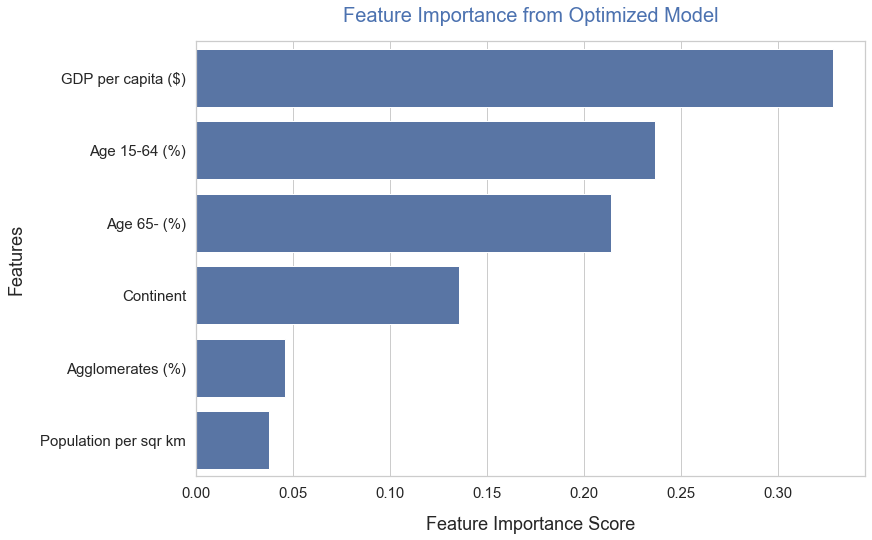

In [51]:
# Visualize feature importances

plt.figure(figsize=(12,8))

sns.barplot(x=feature_imp, y=feature_imp.index, color = 'b')

plt.xlabel('Feature Importance Score', fontsize = 18, labelpad = 15)
plt.ylabel('Features', fontsize = 18, labelpad = 15)
plt.title('Feature Importance from Optimized Model', fontsize = 20, pad = 20, c = 'b')
plt.tick_params(labelsize = 15)

plt.show()

In [52]:
# Main observations:
    # 1) Top features by impotance are GDP per capita and the two age groups as already indicated by the correlation matrix
    # 2) The two population density features are the least important in determining HAQ Index values

In [53]:
# This concludes Section 2
# It has been demonstrated that an ML model using the features selected here can accurately predict 
# the strictly medical countries ratings, HAQ Index

In [54]:
# 3) Predicting Deaths per 100K based on conventional factors using XGBoost

In [55]:
# Create features and target from data_2 which we will use with XGBRegressor model

X = data_2.iloc[:, :-1].values # all columns, but last - include HAQ Index in predicting Deaths per 100K
y = data_2.iloc[:, -1].values # Deaths per 100K column

In [56]:
# Train/test split

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [57]:
# For best predictions, apply model optimization by using hyperopt

# Create hyperparameter space to search over
space = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),
        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),
        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),
        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),
        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),
         'gamma': hp.choice('gamma', np.arange(0, 100, 0.5, dtype = float)),
         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 100, 0.5, dtype = float)),
         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 100, 0.5, dtype = float)),
         
        'objective':'reg:squarederror',
        
        'eval_metric': 'rmse'}


def score(params):
    model = XGBRegressor(**params)
    
    model.fit(X_train_2, y_train_2, eval_set=[(X_train_2, y_train_2), (X_test_2, y_test_2)],
              verbose=False, early_stopping_rounds=10)
    y_pred = model.predict(X_test_2)
    score = np.sqrt(metrics.mean_squared_error(y_test_2, y_pred))
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize(trials, space):
    
    best = fmin(score, space, algo = tpe.suggest, max_evals = 500)
    return best

trials = Trials()
best_params = optimize(trials, space)

7.080724824919022                                                                                                      
7.153799810487325                                                                                                      
7.220746556792694                                                                                                      
7.0778522589409825                                                                                                     
7.138082297057355                                                                                                      
7.060534996527395                                                                                                      
7.161802874906284                                                                                                      
7.152225214994175                                                                                                      
7.074803911843048                       

7.313797825681858                                                                                                      
7.101596621250465                                                                                                      
7.244032250786025                                                                                                      
7.376182736519525                                                                                                      
7.332997907355686                                                                                                      
7.175085909593066                                                                                                      
7.213060036985105                                                                                                      
7.204204282789661                                                                                                      
7.139464619744223                       

7.54329099223328                                                                                                       
7.118250871828185                                                                                                      
7.033425513279967                                                                                                      
7.2960295950922855                                                                                                     
7.089500797686838                                                                                                      
7.3380776515004715                                                                                                     
7.1728731917059                                                                                                        
8.121153670046036                                                                                                      
7.1015052878904354                      

7.244237192566655                                                                                                      
7.143825582269877                                                                                                      
7.225030702473799                                                                                                      
7.118885758961138                                                                                                      
7.204157784191601                                                                                                      
7.439209817403922                                                                                                      
7.200783866025005                                                                                                      
7.013412150264204                                                                                                      
7.151858336757062                       

7.154672599366931                                                                                                      
7.418495344438207                                                                                                      
7.261034808603203                                                                                                      
7.64947801999829                                                                                                       
7.145301391963924                                                                                                      
7.892946865044209                                                                                                      
7.031931647776329                                                                                                      
7.058971983165411                                                                                                      
7.057104178742556                       

7.057281876848615                                                                                                      
7.576951156281051                                                                                                      
7.001384137512029                                                                                                      
7.21235823164795                                                                                                       
7.282484183585037                                                                                                      
7.486005691678398                                                                                                      
7.36025806527862                                                                                                       
7.189504917959857                                                                                                      
7.179757098295147                       

7.0062016229690105                                                                                                     
7.105044433725155                                                                                                      
6.959390388158079                                                                                                      
7.619838761561478                                                                                                      
7.033765549389738                                                                                                      
7.028259790977215                                                                                                      
7.337329590059787                                                                                                      
7.0987107364477575                                                                                                     
7.154485906755042                       

7.22261642697672                                                                                                       
7.194159990681268                                                                                                      
7.042502886716663                                                                                                      
7.128284901893693                                                                                                      
7.886436767894883                                                                                                      
7.211906868975446                                                                                                      
7.144488995689554                                                                                                      
7.078465717387538                                                                                                      
7.330285856635017                       

In [58]:
# Return best parameters

space_eval(space, best_params)

{'colsample_bytree': 0.5,
 'eval_metric': 'rmse',
 'gamma': 12.0,
 'learning_rate': 0.2,
 'max_depth': 12,
 'min_child_weight': 2,
 'n_estimators': 100,
 'objective': 'reg:squarederror',
 'reg_alpha': 12.0,
 'reg_lambda': 79.5,
 'subsample': 0.9}

In [59]:
# Create optimized model

model_2 = XGBRegressor(colsample_bytree = 0.5, 
                         gamma = 12.0,
                         learning_rate = 0.2,
                         max_depth = 12,
                         min_child_weight = 2,
                         n_estimators = 100, 
                         reg_alpha = 12.0, 
                         reg_lambda = 79.5, 
                         subsample = 0.9,  
                         objective = 'reg:squarederror')

In [60]:
# Fit

model_2.fit(X_train_2, y_train_2, 
              eval_set = [(X_train_2, y_train_2), (X_test_2, y_test_2)], 
              eval_metric = 'rmse', 
              verbose = True, 
              early_stopping_rounds = 10)

[0]	validation_0-rmse:21.0956	validation_1-rmse:8.49323
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:20.6016	validation_1-rmse:8.00299
[2]	validation_0-rmse:20.1741	validation_1-rmse:7.66919
[3]	validation_0-rmse:19.8005	validation_1-rmse:7.39805
[4]	validation_0-rmse:19.4435	validation_1-rmse:7.16879
[5]	validation_0-rmse:19.0954	validation_1-rmse:7.0543
[6]	validation_0-rmse:18.7616	validation_1-rmse:6.99261
[7]	validation_0-rmse:18.5428	validation_1-rmse:6.91972
[8]	validation_0-rmse:18.2525	validation_1-rmse:7.03263
[9]	validation_0-rmse:17.9517	validation_1-rmse:7.05119
[10]	validation_0-rmse:17.7099	validation_1-rmse:7.10291
[11]	validation_0-rmse:17.4309	validation_1-rmse:7.13194
[12]	validation_0-rmse:17.1909	validation_1-rmse:7.12756
[13]	validation_0-rmse:16.9223	validation_1-rmse:7.14373
[14]	validation_0-rmse:16.7003	validation_1-rmse:7.225

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=12.0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=12, min_child_weight=2, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=12.0, reg_lambda=79.5,
             scale_pos_weight=1, seed=None, silent=None, subsample=0.9,
             verbosity=1)

In [61]:
# Predict

y_pred_2 = model_2.predict(X_test_2)

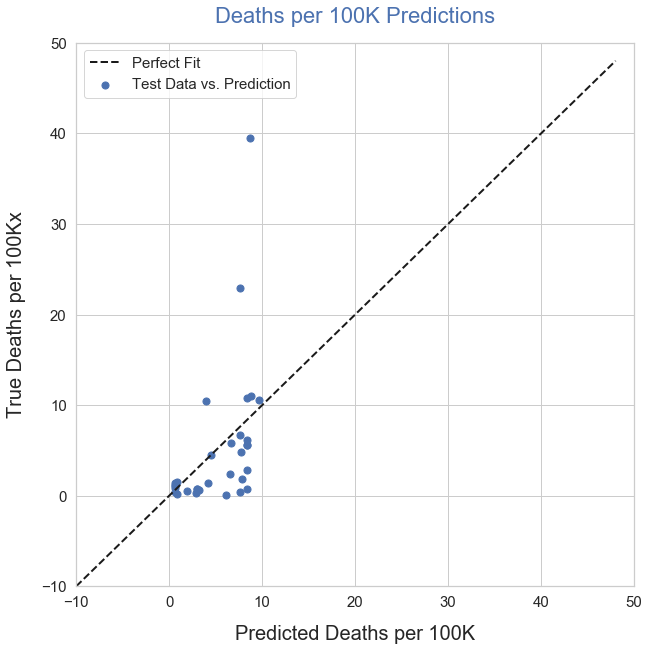

In [62]:
# Compare predictions, y_pred_2, to test values, y_test_2, using scatterplot

# create line to represent perfect fit to y_test

y_line_2 = np.arange(int(y_test_2.min()) - 10, int(y_test_2.max()) + 10)

# set axes limits - adjust if necessary
x_min_2 = -10
x_max_2 = y_test_2.max() + 10
d_x_2 = 10

y_min_2 = -10
y_max_2 = y_test_2.max() + 10
d_y_2 = 10

plt.figure(figsize = (10, 10))
ax = plt.axes()

ax.set_xlim(x_min_2, x_max_2)
ax.set_xticks(np.arange(x_min_2, x_max_2 + d_x_2, d_x_2))

ax.set_ylim(y_min_2, y_max_2)
ax.set_yticks(np.arange(y_min_2, y_max_2 + d_y_2, d_y_2))

plt.scatter(y_pred_2, y_test_2, s = 50, c = 'b', label = 'Test Data vs. Prediction')
plt.plot(y_line_2, y_line_2, 'k--', lw = 2, label = 'Perfect Fit')
plt.xlabel('Predicted Deaths per 100K', fontsize = 20, labelpad = 15)
plt.ylabel('True Deaths per 100Kx', fontsize = 20, labelpad = 15)
plt.title('Deaths per 100K Predictions', fontsize = 22, c = 'b', pad = 20)
plt.legend(fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

In [63]:
# Clearly, there is significant portion of predictions which deviate dramaticaly from the true test values

In [64]:
# Get RMSE as a measure of predictions accuracy

# Absolute RMSE
rmse_2 = np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2))

# Normalized RMSE --> more adequate measure for comperison with other models; ptovides the error in terms of data avg.
rmse_2_norm = rmse_2/y_test_2.mean()

print('Absolute RMSE_2:', round(rmse_2, 4))
print('Normalized RMSE_2:', round(rmse_2_norm, 4))

Absolute RMSE_2: 6.9197
Normalized RMSE_2: 1.3497


In [65]:
# As indicated by the scatter plot, the predictions have poor accuracy --> predictions error is 135 % of the test values average

In [66]:
# Get feature importances

feature_imp = pd.Series(model_2.feature_importances_,index = data_2.iloc[:, :-1].columns).sort_values(ascending = False)
feature_imp

GDP per capita ($)       0.300316
Continent                0.236722
HAQ Index                0.192750
Age 65- (%)              0.086701
Age 15-64 (%)            0.072036
Agglomerates (%)         0.069342
Population per sqr km    0.042133
dtype: float32

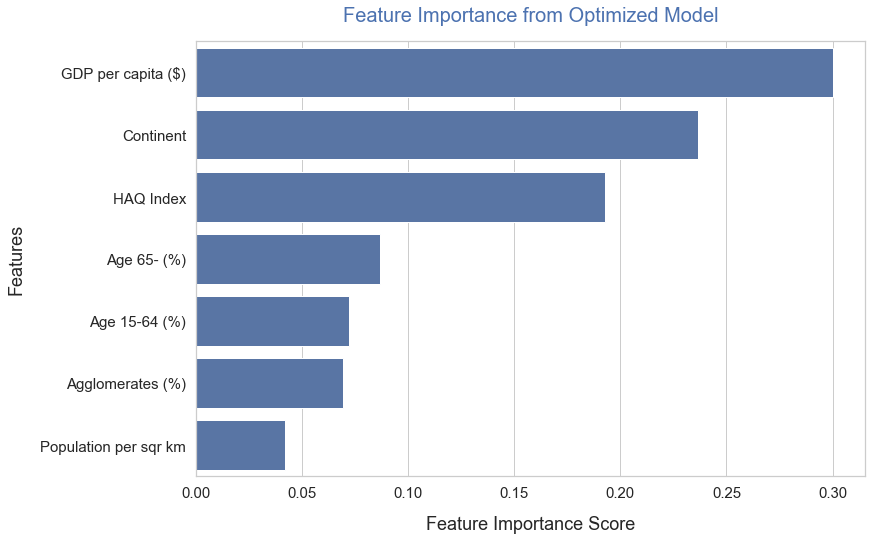

In [67]:
# Visualize feature importances

plt.figure(figsize=(12,8))

sns.barplot(x = feature_imp, y = feature_imp.index, color = 'b')

plt.xlabel('Feature Importance Score', fontsize = 18, labelpad = 15)
plt.ylabel('Features', fontsize = 18, labelpad = 15)
plt.title('Feature Importance from Optimized Model', fontsize = 20, pad = 20, c = 'b')
plt.tick_params(labelsize = 15)

plt.show()

In [ ]:
# Main observations:
    # 1) Top feature by impotance are GDP per capita, Continent and HAQ Index
    # 2) Distant seconds are the two age groups-
    # 2) Population density features are again least important

In [68]:
# Conclusions from Section 3
    # 1) Deaths per 100K cannot be accurately predicted using the factors considered here
    # 2) According to model Age Demografics and Population Density do not play important role

In [69]:
# 4) Comparison between HAQ Index and Deaths per 100K predictions

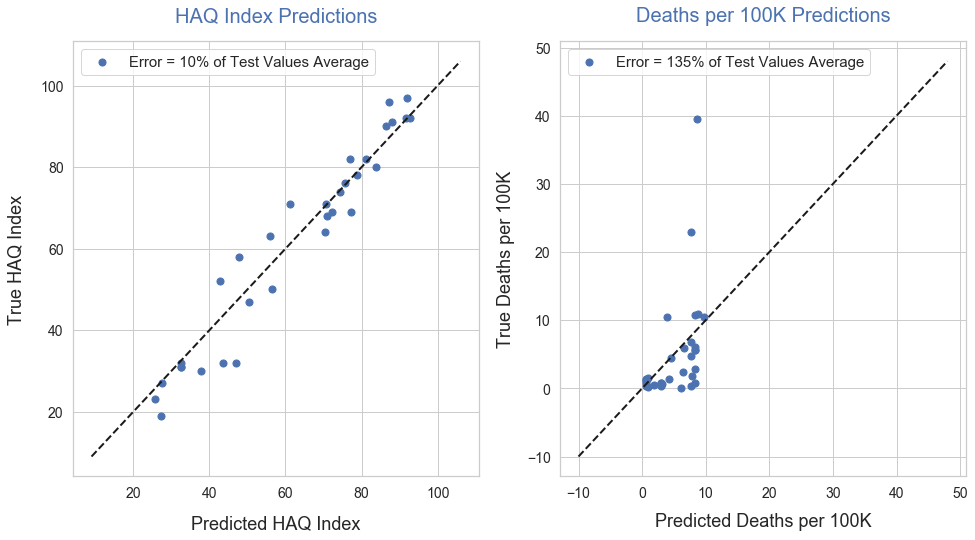

In [70]:
# Demonstrate the contrast in predictions

fig, axes = plt.subplots(1, 2, sharey = False, figsize=(16,8))

# HAQ Index predictions
axes[0].scatter(y_pred_1, y_test_1, s = 50, c = 'b', label = 'Error = 10% of Test Values Average')
axes[0].plot(y_line_1, y_line_1, 'k--', lw = 2)
axes[0].set_title('HAQ Index Predictions', fontsize = 20, c = 'b', pad = 20)
axes[0].set_xlabel('Predicted HAQ Index', fontsize = 18, labelpad = 15)
axes[0].set_ylabel('True HAQ Index', fontsize = 18, labelpad = 15)
axes[0].legend(fontsize = 15)
axes[0].tick_params(labelsize = 14)

# Optimized model predictions
axes[1].scatter(y_pred_2, y_test_2, s = 50, c = 'b', label = 'Error = 135% of Test Values Average')
axes[1].plot(y_line_2, y_line_2, 'k--', lw = 2)
axes[1].set_title('Deaths per 100K Predictions', fontsize = 20, c = 'b', pad = 20)
axes[1].set_xlabel('Predicted Deaths per 100K', fontsize = 18, labelpad = 12)
axes[1].set_ylabel('True Deaths per 100K', fontsize = 18, labelpad = 12)
axes[1].legend(fontsize = 15)
axes[1].tick_params(labelsize = 14)

plt.show()

In [71]:
# The two plots show dramatic difference between predicting HAQ Index and Deaths per 100K

In [72]:
# Conclusions from study

# Using common, well-established data and currenly the most powerfull ML algorithm for tabulated data:
    # a) it is possible to predict accurately the values of purely medical ranking feature, HAQ Index
    # b) it is not possible to predict accurately the supposedly most reliable COVID-19 data, Deaths per 100K

# EDA performed also shows that GDP and HAQ Index have logicaly inverted relationships with Deaths per 100K -->
    # the higher the values of these two features, the higher the likelihood of high Deaths per 100K
    # the lower the values of these two features, the higher the likelihood of low Deaths per 100K

# Based on the study results, the most logical conclusion is that the reported COVID-19 data by country is not accurate -->
# cannot be reliably used to understand the reasons of how and why COVID-19 has affected different countries in different way